# Big Data 분석(II) 일일 과제물

##### A2 노소은

Q) 유방암 결과를 분류하는 신경망 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라.
　그리고 모델의 정확도와 confusion matrix를 구하라.

- 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
- 목표변수(diagnosis : 양성(108개), 음성(benign, 212개

-----------------------------------------------

## 1. 인공신경망

#### 패키지 불러오기

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#한글 폰트 적용# Big Data 분석(II) 종합실습
plt.rcParams["font.family"] = "NanumGothic"

### 1. 데이터 구성하기

In [37]:
df_raw = pd.read_csv("C:/Users/소은/Desktop/Academy/빅데이터/Big Data 분석/유방암.csv", engine = 'python', )

In [38]:
path = 'C:/Program Files/Graphviz/bin/'

### 1. 데이터 구성하기 - 결측치 처리

In [39]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

### 1. 데이터 구성하기 - 더미변수 생성

In [40]:
df_dummy = pd.get_dummies(df_raw) #더미변수 생성
df_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_양성,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,0,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,1,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,0,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,1,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1,0


In [41]:
df_raw_y = df_raw['diagnosis']
df_raw_x = df_raw.drop('diagnosis',axis=1,inplace=False)

### 1. 데이터 구성하기 - 데이터 분할

In [56]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size=0.4, random_state=1234)
#주어진 조건과 같이 train은 0.6, test는 0.4비율로 분할
print("train data x size : {}".format(df_train_x.shape))
print("train data y size : {}".format(df_train_y.shape))
print("test data x size : {}".format(df_test_x.shape))
print("test data y size : {}".format(df_test_y.shape))

train data x size : (192, 30)
train data y size : (192,)
test data x size : (128, 30)
test data y size : (128,)


### 2. MLPClassifier 모델 생성 - 기본 옵션으로 모델 생성

In [57]:
nn_uncustomized = MLPClassifier(random_state=123)
nn_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.599
Accuracy on test set:0.758


- 모델 정확도는 train 59.9%, test 75.8%이다. 

- radom_state를 1234로 했을 때 '최대 반복에 도달했으며 최적화가 아직 수렴되지 않았습니다.'라는 에러 코드가 떠 123으로 설정
- radom_state : 재현가능(for reproducibility)하도록 난수의 초기값을 설정해주는 것이며, 아무 숫자나 넣어줘도 무방

### 현재 생성된 SVC 모델의 옵션 확인

In [86]:
nn_uncustomized

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### 2. MLPClaasifier 모델 parameter 변경 - Hidden Layer :은닉층 변경

In [95]:
#train 및 test 정확도 결과 저장용
train_accuracy = [];test_accuracy=[]
#hidden_layer_sizes:은닉층 변경
para_hidden = [20* hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=123)
#     nn = MLPClassifier(hidden_layer_sized= (v_hidden,v_hidden),random_state=123)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
#데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 2. MLPClaasifier 모델 parameter 변경 - Hidden Layer :은닉층 변경도 결과

In [96]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.583,0.766
1,40,0.911,0.852
2,60,0.599,0.758
3,80,0.599,0.758
4,100,0.599,0.758
5,120,0.599,0.758
6,140,0.599,0.758
7,160,0.859,0.812


- 은닉층 1개, 노드 20~160변경

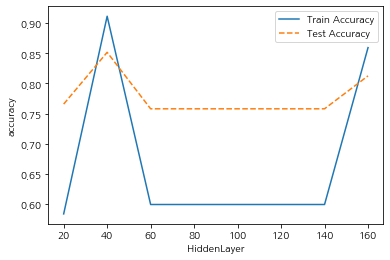

In [97]:
#모델 정확도 그래프 확인
plt.plot(para_hidden,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_hidden,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("HiddenLayer")
plt.legend()

- 은닉층 구조가 복잡할수록 모델 정확도는 향상됨

### MLPClassifier 모델 parameter 변경 - Activation : 활성화 함수 변경

In [103]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#activation 변경
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn=MLPClassifier(activation = v_function,random_state = 123)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### MLPClassifier 모델 parameter 변경 - Activation : 활성화 함수 변경 결과

In [104]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.943,0.906
1,tanh,0.922,0.898
2,relu,0.599,0.758


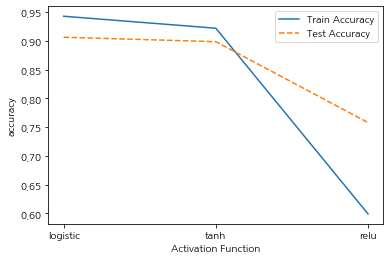

In [105]:
#모델 정확도 그래프 확인
plt.plot(para_function,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_function,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel('Activation Function')
plt.legend()

- 'relu' 함수 적용시 모델의 정확도가 상대적으로 낮음
- 단, scale 변환 후 모델 성능 비교 필요

### 2. Scale 변환 - Standardscaler : 설명변수 scale 변경

In [106]:
#변수명 저장
v_feature_name = df_train_x.columns

#standardscaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [107]:
#데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state = 1234)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))

train data X size:(192, 30)
test data X size:(128, 30)


### sclae 조절 후 MLPClassifier 모델 재실행 - scale이 조정된 데이터로 새로운 모델 생성

In [108]:
nn_scaled = MLPClassifier(random_state = 123)
nn_scaled.fit(df_scaled_train_x, df_train_y)
#train 데이터 셋 정확도
print('Accuracy on training set:{:.3f}'.format(nn_scaled.score(df_scaled_train_x,df_train_y)))
#test 데이터 셋 정확도
print('Accuracy on test set:{:.3f}'.format(nn_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set:0.995
Accuracy on test set:0.945


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- 기존 인공 신경망 모델 정확도는 아래와 같다.  
Accuracy on training set:0.599  
Accuracy on test set:0.758  
- 기존 인공 신경망 모델과 비교했을 때 정확도가 상승한 것을 확인할 수 있다.

### 새로운 MLPClassifer 모델 parameter 변경 - Hiiden Layer : 은닉층 변경

In [115]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#hidden_layer_sizes: 은닉층 변경
para_hidden = [20 * hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 새로운 MLPClassifer 모델 parameter 변경 - Hiiden Layer : 은닉층 변경 결과

In [116]:
#은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.995,0.953
1,40,0.995,0.953
2,60,0.995,0.953
3,80,1.000,0.938
4,100,1.000,0.945
5,120,1.000,0.953
6,140,1.000,0.945
7,160,1.000,0.953
8,180,1.000,0.953
9,200,1.000,0.945


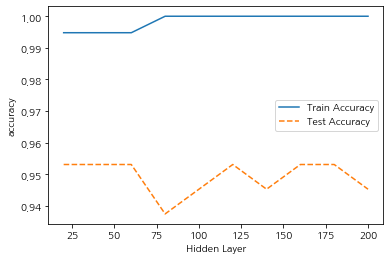

In [117]:
#모델 정확도 그래프 확인
plt.plot(para_hidden,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_hidden,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Hidden Layer")
plt.legend()

- 은닉층 구조가 복잡할수록 모델 정확도는 향상됨

### 새로운 MLPClassifer 모델 parameter 변경 - Activation : 활성화 함수 변경

In [119]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#activation 변경
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn=MLPClassifier(activation = v_function,hidden_layer_sizes=(80,80),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 새로운 MLPClassifier 모델 평가 - Activation : 활성화 함수 변경 결과

In [120]:
#Activation Function 별 정확도 테이블
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.995,0.945
1,tanh,1.000,0.953
2,relu,1.000,0.938


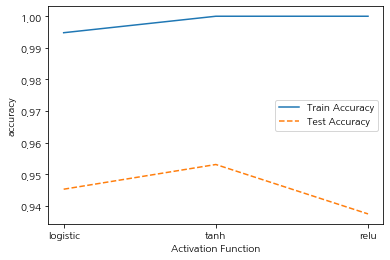

In [122]:
#Activation Function 별 정확도 그래프로 확인
plt.plot(para_function,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_function,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Activation Function")
plt.legend()

- 'relu' 함수의 모델이 가장 높은 정확도를 보임
- 특히, 데이터 scaling 영향을 많이 받음

- Activation Function 지정(임의)

In [78]:
activation = 'relu'

### 새로운 MLPClassifier 모델 parameter 변경 - Solver: 가중치 최적화 변경

In [79]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#solver 변경
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn=MLPClassifier(solver= v_solver, activation ='relu',hidden_layer_sizes=(80,80),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["ActivationFunction"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 새로운 MLPClassifier 모델 평가 - Solver : 가중치 최적화 변경 결과

In [123]:
#solver별 정확도 테이블
df_accuracy_solver.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.938
1,sgd,0.979,0.906
2,adam,1.000,0.938


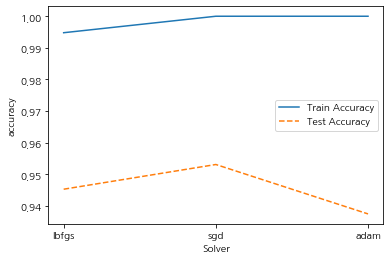

In [124]:
#정확도 그래프 표현
plt.plot(para_solver,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_solver,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Solver")
plt.legend()

- 'adam' 최적화 모델이 가자 높은 정확도를 보인다.
- 특히 대량 데이터 적용시 모델의 성능이 우수한 편이다.

### 새로운 MLPClassifer 모델 parameter 변경 - Mini Batch 변경

In [125]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_batch = [20 * batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn=MLPClassifier(batch_size= v_batch, solver = 'adam', activation = 'relu',hidden_layer_sizes=(80,80),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["MiniBatch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

### 새로운 MLPClassifer 모델 parameter 변경 - Mini Batch 변경 결과

In [126]:
#mini batch size별 정확도 테이블
df_accuracy_batch.round(3)

,MiniBatch,TrainAccuracy,TestAccuracy
0,20,1.0,0.938
1,40,1.0,0.938
2,60,1.0,0.938
3,80,1.0,0.938
4,100,1.0,0.938
5,120,1.0,0.938
6,140,1.0,0.938
7,160,1.0,0.938
8,180,1.0,0.945


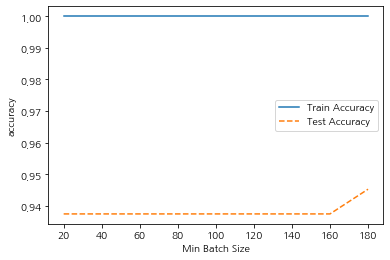

In [127]:
#정확도 그래프 표현
plt.plot(para_batch,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_batch,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Min Batch Size")
plt.legend()

- train 데이터에는 과적합 경향
- test 데이터는 미니 배치 크기가 증가할수록 오차 증가 경향성 있음

### 결론 도출 - 최종 모델 선택

In [128]:
#최종 모델
nn_final = MLPClassifier(hidden_layer_sizes = (80, 80), activation = 'relu', solver ='adam', batch_size = 100, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)
#train  데이터 셋 정확도
print('Accuracy on training set:{:.3f}'.format(nn_final.score(df_scaled_train_x,df_train_y)))
#test 데이터 셋 정확도
print('Accuracy on test set:{:.3f}\n'.format(nn_final.score(df_scaled_test_x,df_test_y)))
#confusion matrix
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
#목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set:1.000
Accuracy on test set:0.938

confusion matrix:
[[31  0]
 [ 8 89]]
              precision    recall  f1-score   support

          양성      0.795     1.000     0.886        31
          음성      1.000     0.918     0.957        97

    accuracy                          0.938       128
   macro avg      0.897     0.959     0.921       128
weighted avg      0.950     0.938     0.940       128



- test 데이터 기준 정분류율은 93.8%
- '양성' 기준 f1 score은 88.6%(다른 모델 대비 높은 편)
(precision은 낮으나 recall이 높다.)

--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------

## 2. KNN분석

#### 패키지 불러오기

In [15]:
# 데이터 구성: Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns


### 1. 데이터 구성하기

In [16]:
df_raw = pd.read_csv("C:/Users/소은/Desktop/Academy/빅데이터/Big Data 분석/유방암.csv", engine = 'python', )

In [17]:
path = 'C:/Program Files/Graphviz/bin/'# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")

### 1. 데이터 구성하기 - 결측치 처리

In [9]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

### 1. 데이터 구성하기 - 더미변수 생성

In [19]:
df_dummy = pd.get_dummies(df_raw) #더미변수 생성
df_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_양성,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,0,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,1,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,0,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,1,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1,0


### 1. 데이터 구성하기 - 데이터 분할

In [21]:
df_raw_y = df_raw['diagnosis']
df_raw_x = df_raw.drop('diagnosis',axis=1,inplace=False)

In [23]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size=0.4, random_state=1234)
#주어진 조건과 같이 train은 0.6, test는 0.4비율로 분할
print("train data x size : {}".format(df_train_x.shape))
print("train data y size : {}".format(df_train_y.shape))
print("test data x size : {}".format(df_test_x.shape))
print("test data y size : {}".format(df_test_y.shape))

train data x size : (192, 30)
train data y size : (192,)
test data x size : (128, 30)
test data y size : (128,)


### 2. 모델 생성 - 기본 옵션으로 모델 생성

In [24]:
# KNN 모델 생성(default 설정)
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.932
Accuracy on test set: 0.914


- 모델 정확도는 train 93.2%, test 91.4%로 성능은 유사한 수준이나 다소 과소적합

In [25]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 2. 모델 생성 - 이웃 수 증가에 따른 정확도 변화

In [26]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 최대 이웃 수: 1 ~ 15
para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuacy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,neighbors,TrainAccuacy,TestAccuracy
0,1,1.000,0.898
1,2,0.922,0.875
2,3,0.932,0.898
3,4,0.932,0.906
4,5,0.932,0.914
5,6,0.927,0.930
6,7,0.927,0.898
7,8,0.906,0.883
8,9,0.911,0.906
9,10,0.906,0.938


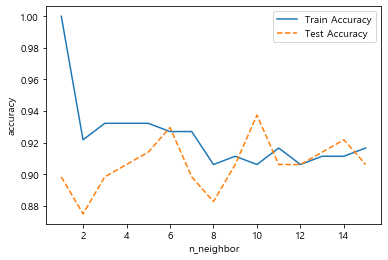

In [27]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbor")
plt.legend()

### 2. 모델 생성 - 가중치별 이웃 수 증가에 따른 정확도 변화

In [28]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃수
para_n_neighbors = [i for i in range(1, 11)] * 2
# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10)
# zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을  하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]
for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuacy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuacy,TestAccuracy
0,1,uniform,1.000,0.898
1,2,uniform,0.922,0.875
2,3,uniform,0.932,0.898
3,4,uniform,0.932,0.906
4,5,uniform,0.932,0.914
5,6,uniform,0.927,0.930
6,7,uniform,0.927,0.898
7,8,uniform,0.906,0.883
8,9,uniform,0.911,0.906
9,10,uniform,0.906,0.938


In [29]:
# 그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index="Neighbors", columns="Weights", values=["TrainAccuacy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuacy           TestAccuracy          
Weights       distance   uniform     distance   uniform
Neighbors                                              
1                  1.0  1.000000     0.898438  0.898438
2                  1.0  0.921875     0.898438  0.875000
3                  1.0  0.932292     0.898438  0.898438
4                  1.0  0.932292     0.898438  0.906250
5                  1.0  0.932292     0.914062  0.914062
6                  1.0  0.927083     0.929688  0.929688
7                  1.0  0.927083     0.890625  0.898438
8                  1.0  0.906250     0.906250  0.882812
9                  1.0  0.911458     0.914062  0.906250
10                 1.0  0.906250     0.929688  0.937500

In [30]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "-" + level1
df_accuracy_weights_pivot.head()

,TrainAccuacy-distance,TrainAccuacy-uniform,TestAccuracy-distance,TestAccuracy-uniform
Neighbors,,,,
1,1.0,1.000000,0.898438,0.898438
2,1.0,0.921875,0.898438,0.875000
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.932292,0.898438,0.906250
5,1.0,0.932292,0.914062,0.914062


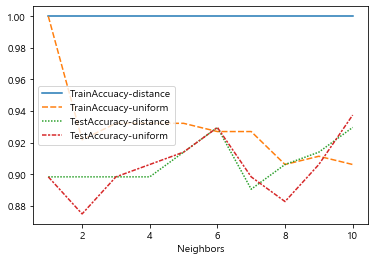

In [31]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data=df_accuracy_weights_pivot)

- 가중치 distance일 때 train 데이터의 모델 정확도는 1 (과대적합)

In [32]:
# 임의로 지정
weights = "uniform"

### 2. 모델 생성 - 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [33]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃수
para_n_neighbors = [i for i in range(1, 11)] * 3
# 거리 계산 방법(minkowski, euclidean, manhattan)
para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuacy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuacy,TestAccuracy
0,1,minkowski,1.000,0.898
1,2,minkowski,0.922,0.875
2,3,minkowski,0.932,0.898
3,4,minkowski,0.932,0.906
4,5,minkowski,0.932,0.914
5,6,minkowski,0.927,0.930
6,7,minkowski,0.927,0.898
7,8,minkowski,0.906,0.883
8,9,minkowski,0.911,0.906
9,10,minkowski,0.906,0.938


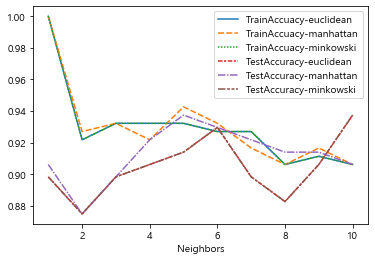

In [34]:
# 그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors", columns="Metric", values=["TrainAccuacy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "-" + level1
sns.lineplot(data=df_accuracy_metric_pivot)

- test정확도 manhattan와 minkowski는 다른 방법 대비 거리 계산 방법 별 정확도의 차이가 있다.

### 최종모델

In [35]:
# 최종 모델
knn_final = KNeighborsClassifier(n_neighbors=4, weights="uniform", metric="euclidean")
knn_final.fit(df_train_x, df_train_y)
y_pred = knn_final.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(knn_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(knn_final.score(df_test_x, df_test_y)))
# confusion_matrix
print("Confusion Matrix: {}".format(confusion_matrix(df_test_y, y_pred)))
# 목표변수의 빈도 불균형: f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.932
Accuracy on test set: 0.906
Confusion Matrix: [[30  1]
 [11 86]]
              precision    recall  f1-score   support

          양성      0.732     0.968     0.833        31
          음성      0.989     0.887     0.935        97

    accuracy                          0.906       128
   macro avg      0.860     0.927     0.884       128
weighted avg      0.926     0.906     0.910       128



- test 데이터 기준 정확도: 93.2%
- 이웃수 : 4
- 가중치 : 균일(uniform)
- 거리 계산: 차이 없음
    
- "양성" 기준 f1 score은 83.3%(다른 모델 대비 높다)
(precision은 보다 낮으나 recall이 높음)